#### Scrape new images off of live-webcam services

In [1]:
%matplotlib inline
import os
import time
import cv2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import requests as req
import datetime as dt

In [2]:
URLS = [
    ('e39_aug_s', 'https://www.vegvesen.no/public/webkamera/kamera?id=2986247', cv2.IMREAD_COLOR), # E39 Auglend Sør
    ('e39_aug_n', 'https://www.vegvesen.no/public/webkamera/kamera?id=2992499', cv2.IMREAD_COLOR), # E39 Auglend Nord
    ('e6_osen', 'https://www.vegvesen.no/public/webkamera/kamera?id=100082', cv2.IMREAD_COLOR) # E6 Osen
]
IMG_HTBL = set() # Store image hashes here so we do not re-save the same images over and over again.
# cv2.IMREAD_GRAYSCALE
# cv2.IMREAD_COLOR

In [3]:
def show_image(img, grayscale=False):
    plt.figure(figsize=(12,8))
    ax = plt.subplot(111)
    if grayscale:
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)        
    else:
        plt.imshow(img)
    plt.xticks([]),plt.yticks([])
    ax.axis("off")
    plt.tight_layout()
    plt.show()

def get_image(prefix, url, flags=cv2.IMREAD_COLOR):    
    r = req.get(url)
    if r.status_code != 200: # Is the camera down?
        return None
    
    h = hash(str(r.content))
    if h in IMG_HTBL: # Don't process the same image twice.
        return None
    
    IMG_HTBL.add(h)
    img = cv2.imdecode(np.frombuffer(r.content, dtype=np.uint8), flags)
    timestr = dt.datetime.now().strftime("%d-%m-%H-%M")
    cv2.imwrite('../../data/raw/{}_{}.jpg'.format(prefix, timestr), img)

In [4]:
while True:
    for prefix, url, flags in URLS:
        _ = get_image(prefix, url, flags)
        time.sleep(0.2)
    time.sleep(30)

KeyboardInterrupt: 

In [4]:
def get_image_test(url, flags=cv2.IMREAD_COLOR):
    r = req.get(url)
    if r.status_code != 200: # Is the camera down?
        return None
    return cv2.imdecode(np.frombuffer(r.content, dtype=np.uint8), flags) 

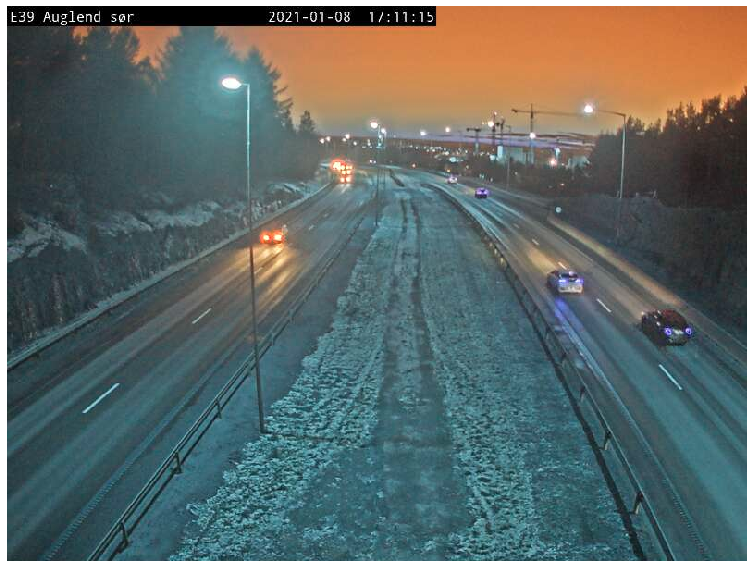

In [5]:
show_image(get_image_test(URLS[0][1]))

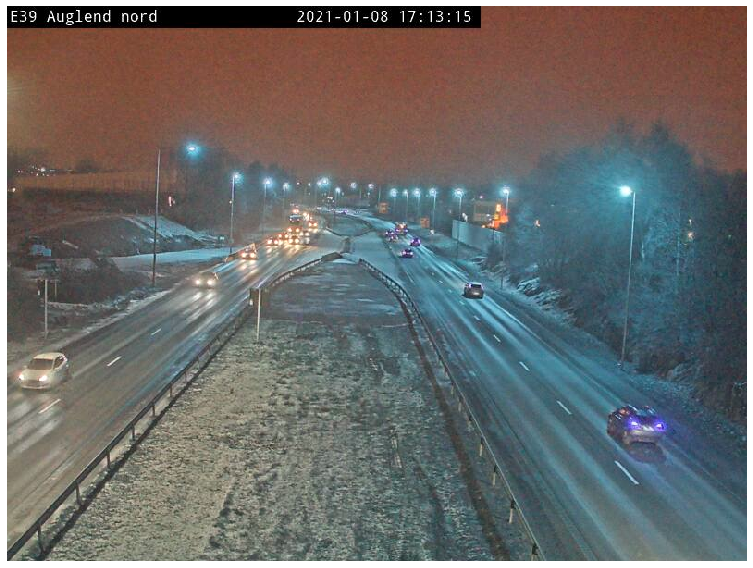

In [6]:
show_image(get_image_test(URLS[1][1]))

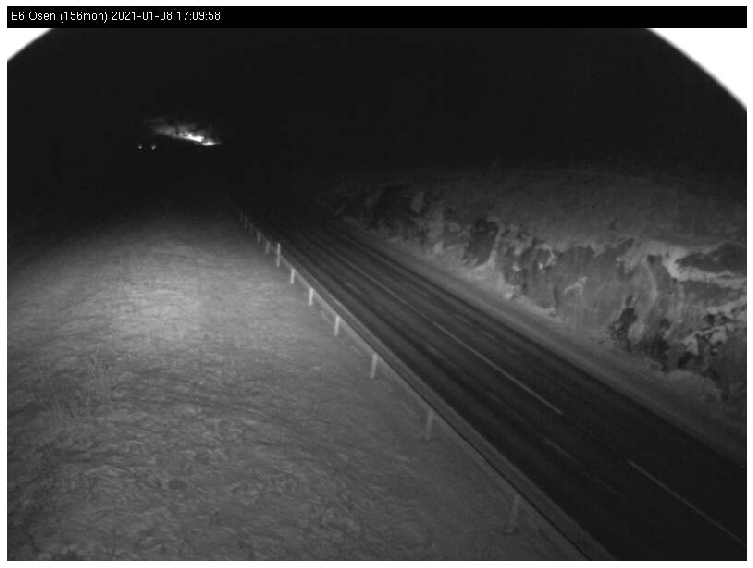

In [7]:
show_image(get_image_test(URLS[2][1]))